# XML retrieval

### General idea

Create a tree where each node contains the structure eg. author, title, citation...  
each leaf contains the text. eg. `author -> surname -> "penyet"`

### Lexicalised sub trees

- Take each leaf node and break it into multiple nodes with its parents (representing the structure)

Use a vector space to encode each word together with its position in the XML tree.  
eg. `title -> "microsoft"` and `book -> author -> "bill"`

**Difference between traditional VSMs:**  
In this case we are storing the structure and comparing the structural similarity instead.

#### Tradeoffs

There is a tradeoff between dimensionality of space and accuracy of query results.
- If we restrict dimensions to vocab terms, VSM will retrieve many documents that do not match the structure of query
- If we create a seperate dimension for each **lexicalised subtree**, the dimensionality becomes too large

Compromise: index all paths that end in a single vocab term. -> XML context term pairs. `<c, t>, c is the context tree`

### Context resemblance

Context resemblance is the measure of similarity between a path C_q of query and C_d of document. C_q matches C_d iff we can transform C_q into C_d by *inserting additional nodes*. (it does not take into account for transposition).  
eg.  
`author -> surname -> penyet` vs `author -> middlename -> ayam` do not match and will given a default score of 0.

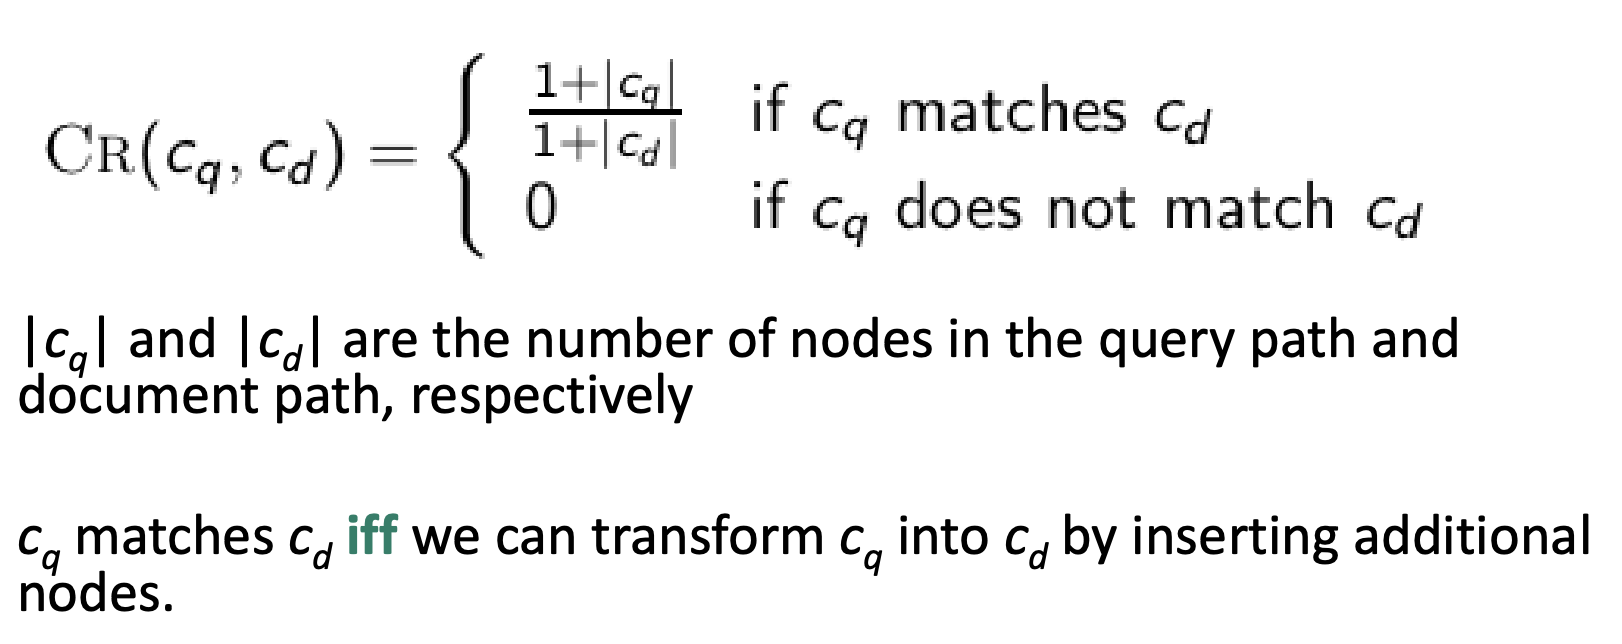

#### Cons of such resemblance
1. Does not consider transposition, eg. what if we wish to compare between surname vs middlename.
2. Users need to know the exact structural types within the system to know what structural type to use  
eg. user might wish to search for `author -> name -> wilson` instead of `author -> middlename -> wilson` in this case it wont match at all.

In [1]:
# Document similarity measure pseudo code

def SimNoMerge (docs, q):
    score = {}
    for doc in docs:
        score[doc] = 0
    for c_q, term in q:
        weight_q = weight (q, term, c_q) # Find the weight of term in XML structure in query
        for context in XML_contexts:
            # Note that c_q != context. c_q could be c_1 and we are comparing between
            # c_1 vs c_2, c_1 vs c_3, c_1 vs c_4 etc etc
            if (cr(c_q , context) > 0): # There is a match in lexicalised subtree
                postings = get_postings((context, term))
                for doc in postings:
                    x = cr(c_q, context) * weight_q * weight(doc, term, context) 
                    # Weight of term in XML structure in document
                    score[doc] += x
    for doc in score:
        score[doc] /= normaliser(doc)
    return score

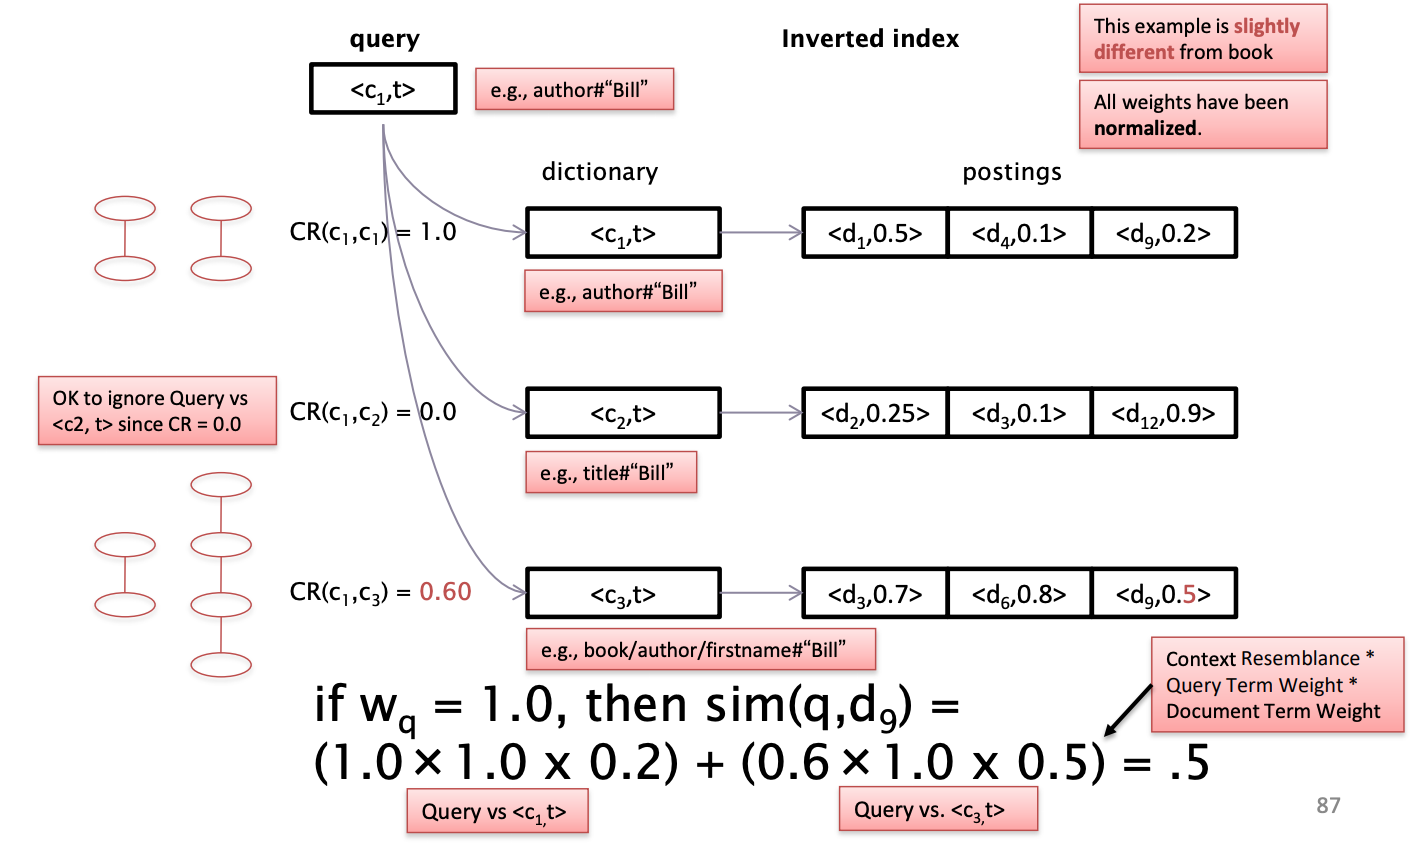

### XML IR evaluation

Initiative for the eval of XML retrieval. (INEX)

#### Component coverage
1. Exact coverage (E): information sought is the main topic of the component and the component is a meaningful unit of info
2. Too small (S): the information sought is the main topic of the component but the component is not meaningful.
3. Too large (L): the information sought is present in the component but is not the main topic
4. No coverage (N): The information sought is not the topic of the component

#### Topical relevance
1. Highly relevant (3)
2. Fairly relevant (2)
3. Marginally relevant (1)
4. Non relevant (0)

#### Combination
Relevance is judged based on the 2 components: relevance and coverage  
We then use a quantisation function **Q** to grade each component as partially relevant.